# Assignment - 4

## CS22B1093 Rohan G

-------------

#### Importing necessary libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

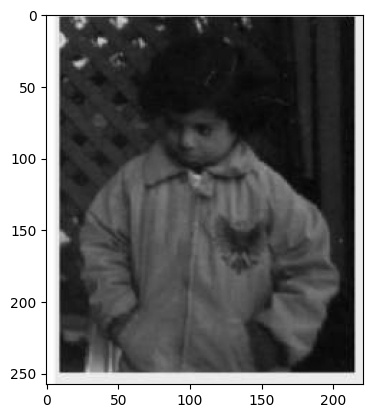

In [49]:
img = cv2.imread("pout-dark.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [50]:
print(img)

[[255 255 254 ... 240 240 240]
 [255 255 254 ... 240 240 240]
 [255 255 254 ... 240 240 240]
 ...
 [255 255 254 ... 240 240 240]
 [255 255 254 ... 240 240 240]
 [255 255 254 ... 240 240 240]]


/tmp/ipykernel_7080/455504025.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(),256,[0,256])


(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+01, 2.100e+01, 1.090e+02, 2.140e+02,
        5.160e+02, 7.650e+02, 1.162e+0

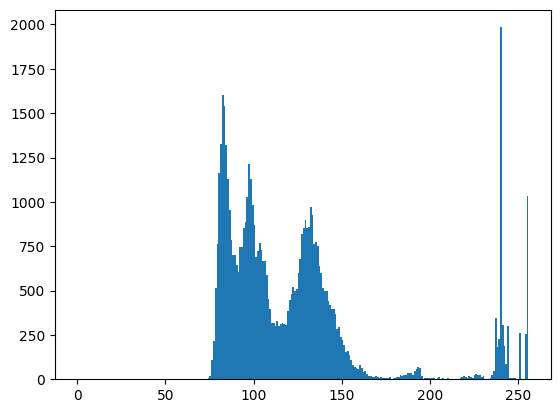

In [51]:
plt.hist(img.ravel(),256,[0,256])

#### Histogram Equalization| Transform

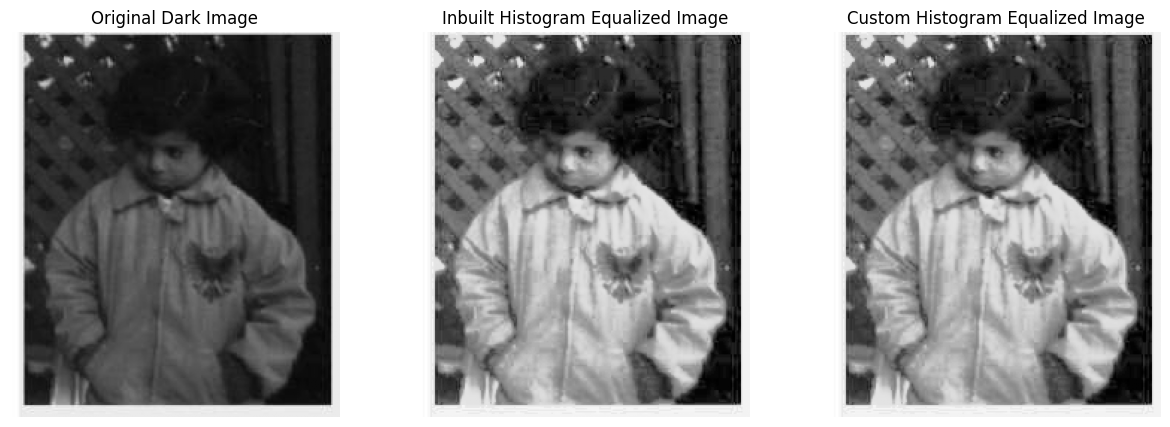

In [52]:
dark_img_path = "pout-dark.jpg"
dark_img = cv2.imread(dark_img_path, cv2.IMREAD_GRAYSCALE)

# Custom function for histogram equalization
def custom_histogram_equalization(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()  
    cdf_normalized = cdf / cdf.max() * 255 

    # Map the intensity values
    equalized_img = np.interp(img.flatten(), bins[:-1], cdf_normalized).reshape(img.shape)
    return equalized_img.astype(np.uint8)

equalized_img_custom = custom_histogram_equalization(dark_img)
equalized_img_inbuilt = cv2.equalizeHist(dark_img)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.imshow(dark_img, cmap='gray')
plt.title("Original Dark Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(equalized_img_inbuilt, cmap='gray')
plt.title("Inbuilt Histogram Equalized Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(equalized_img_custom, cmap='gray')
plt.title("Custom Histogram Equalized Image")
plt.axis("off")

plt.show()

/tmp/ipykernel_7080/2732706440.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized_img_custom.ravel(),256,[0,256])


(array([ 143.,  214.,    0.,  516.,    0.,    0.,    0.,  765.,    0.,
           0.,    0.,    0., 1162.,    0.,    0.,    0.,    0.,    0.,
        1328.,    0.,    0.,    0.,    0.,    0.,    0., 1605.,    0.,
           0.,    0.,    0.,    0.,    0., 1539.,    0.,    0.,    0.,
           0.,    0., 1322.,    0.,    0.,    0.,    0., 1131.,    0.,
           0.,    0.,  952.,    0.,    0.,    0.,  786.,    0.,    0.,
         699.,    0.,    0.,  702.,    0.,    0.,  645.,    0.,    0.,
         603.,    0.,    0.,  745.,    0.,    0.,  745.,    0.,    0.,
           0.,  853.,    0.,    0.,    0.,  889.,    0.,    0.,    0.,
           0., 1029.,    0.,    0.,    0.,    0., 1216.,    0.,    0.,
           0.,    0., 1131.,    0.,    0.,    0.,    0.,  980.,    0.,
           0.,  868.,    0.,    0.,    0.,  691.,    0.,    0.,  721.,
           0.,    0.,  766.,    0.,    0.,  731.,    0.,    0.,  668.,
           0.,    0.,  664.,    0.,    0.,  590.,    0.,  455.,    0.,
      

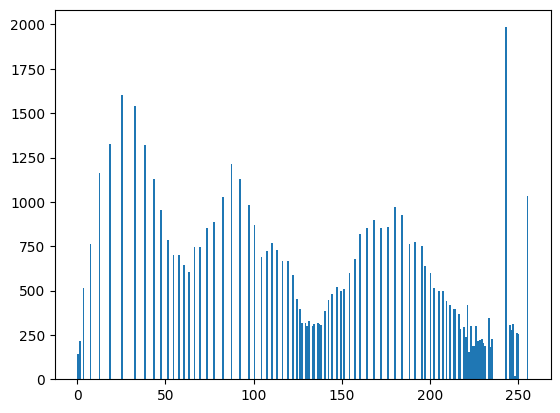

In [53]:
plt.hist(equalized_img_custom.ravel(),256,[0,256])

#### Histogram Matching Transform

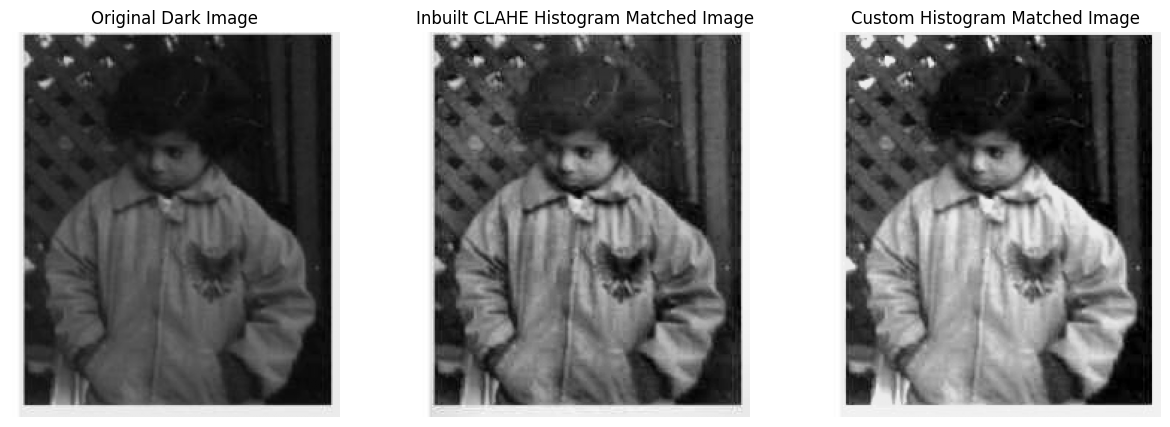

In [54]:
dark_img_path = "pout-dark.jpg"
bright_img_path = "pout-bright.jpg"

dark_img = cv2.imread(dark_img_path, cv2.IMREAD_GRAYSCALE)
bright_img = cv2.imread(bright_img_path, cv2.IMREAD_GRAYSCALE)

# Custom function for histogram matching
def custom_histogram_matching(source, reference):
    source_hist, bins = np.histogram(source.flatten(), 256, [0, 256])
    reference_hist, _ = np.histogram(reference.flatten(), 256, [0, 256])

    # Compute CDFs
    source_cdf = source_hist.cumsum() / source_hist.sum()
    reference_cdf = reference_hist.cumsum() / reference_hist.sum()

    # Create a mapping from source to reference
    mapping = np.interp(source_cdf, reference_cdf, np.arange(256))

    # Apply mapping
    matched_image = np.interp(source.flatten(), bins[:-1], mapping).reshape(source.shape)
    return matched_image.astype(np.uint8)

matched_img_custom = custom_histogram_matching(dark_img, bright_img)

# approximating using CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
matched_img_inbuilt = clahe.apply(dark_img)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.imshow(dark_img, cmap='gray')
plt.title("Original Dark Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(matched_img_inbuilt, cmap='gray')
plt.title("Inbuilt CLAHE Histogram Matched Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(matched_img_custom, cmap='gray')
plt.title("Custom Histogram Matched Image")
plt.axis("off")

plt.show()

/tmp/ipykernel_7080/1178949631.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(matched_img_custom.ravel(),256,[0,256])


(array([ 357.,    0.,  516.,    0.,    0.,  765.,    0.,    0., 1162.,
           0.,    0., 1328.,    0., 1605.,    0.,    0., 1539.,    0.,
           0.,    0., 1322.,    0.,    0.,    0., 1131.,    0.,    0.,
         952.,    0.,    0.,  786.,    0.,    0.,  699.,    0.,    0.,
           0.,  702.,    0.,    0.,  645.,    0.,    0.,  603.,    0.,
           0.,  745.,    0.,  745.,    0.,    0.,  853.,    0.,    0.,
         889.,    0.,    0., 1029.,    0.,    0.,    0., 1216.,    0.,
           0., 1131.,    0.,    0.,  980.,    0.,    0.,    0.,  868.,
           0.,    0.,  691.,    0.,  721.,    0.,    0.,    0.,  766.,
           0.,    0.,  731.,    0.,    0.,  668.,    0.,    0.,  664.,
           0.,    0.,  590.,    0.,    0.,    0.,  455.,    0.,    0.,
         396.,    0.,    0.,  316.,    0.,    0.,  319.,    0.,  298.,
           0.,    0.,    0.,  327.,    0.,    0.,  303.,    0.,    0.,
         311.,    0.,    0.,  320.,    0.,    0.,  313.,    0.,    0.,
      

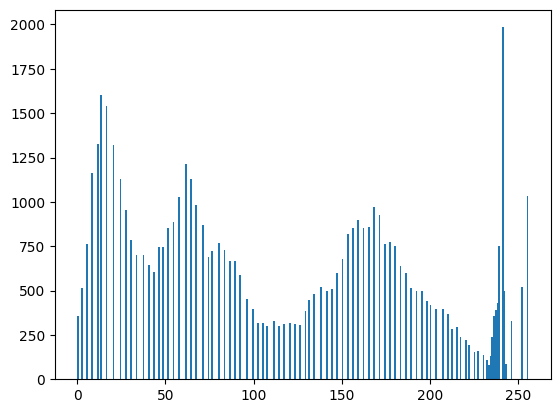

In [55]:
plt.hist(matched_img_custom.ravel(),256,[0,256])

-------